# Redukcja wymiarowości

<div class="alert alert-block alert-success">
📍<b>Dimensionality Reduction</b> - Redukcja wymiarowości<br>
Redukcja wymiaru jest to proces przekształcający pierwotny zbiór danych w zbiór o mniejszej liczbie wymiarów, mający na celu zachowanie jak największej ilości informacji.<br><br>
Dlaczego to robimy?<br>
- Klątwa wymiarowości - im więcej wymiarów, tym większe ryzyko przetrenowania modelu<br>
- Redukcja wymiarowości pozwala lepiej zrozumieć dane i zwizualizować je.
</div>

## Table of content

1. [PCA](#PCA)
    - [Przygotowanie danych](#Przygotowanie-danych)
    - [Skalowanie danych](#Skalowanie-danych)
    - [Analiza Głównych Składowych](#Analiza-Głównych-Składowych)<br><br>
2. [t-SNE](#t-SNE)


# PCA

<div class="alert alert-block alert-success">
📍<b>Principal Component Analysis</b> - Analiza Głównych Składowych<br>
    Polega na rzutowaniu danych na hiperpłaszczyznę znajdującą się jak najbliżej tych danych.<br>
    Dzięki PCA wyznaczamy osie (składowe) zachowujące największą wariancję danych. Po zidentyfikowaniu głównych składowych, redukujemy wymiarowość poprzez rzutowanie danych na hiperpłaszczyznę zdefiniowaną przez te składowe.
</div>

<div class="alert alert-block alert-success">
<b>Schemat PCA</b><br>
<ol>
<li>Standaryzacja $d$-wymiarowego zestawu danych</li>
<li>Stworzenie macierzy kowariancji</li>
<li>Rozkład macierzy kowariancji na wektory własne i wartości własne</li>
<li>Szeregowanie wartości własnych w kolejności malejącej w celu dopasowania ich do odpowiednich wektorów własnych</li>
<li>Wybów k wektorów własnych odpowiadających $k$ największym wartościom własnym</li>
    $k$ - liczba wymiarów nowej podprzestrzeni cech ( $ k \le d $ )
<li>Utworzenie macierzy rzutowania W (macierz transformacji) z $k$ najlepszych wektorów własnych</li>
<li>Przekształcenie $d$-wymiarowego początkowego zbioru danych X za pomocą macierzy rzutowania W, w celu uzyskania nowej, $k$-wymiarowej podprzestrzeni cech</li>
</ol>
    </div>

## Przygotowanie danych

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [32]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<b>Atrybuty</b>

- radius - promień (średnia odległości od środka do punktów na obwodzie)
- texture - tekstura (odchylenie standardowe wartości skali szarości)
- perimeter - obwód
- area - powierzchnia
- smoothness - gładkość (lokalna zmienność długości promieni)
- compactness - zwartość (obwód^2 / powierzchnia - 1,0)
- concavity - wklęsłość
- concave points - punkty wklęsłe (liczba wklęsłych części konturu)
- symmetry - symetria
- fractal dimension - wymiar fraktalny ("przybliżenie linii brzegowej" - 1)

## Skalowanie danych

<div class="alert alert-block alert-warning">
    📌 Przed zastosowaniem PCA, musimy przeskalować nasze dane, aby miały jednolitą wariancję. Jest to konieczne, ponieważ algorytm bazuje na odległościach pomiędzy zmiennymi.
    </div>

Dla chętnych: sprawdźcie, jak będą kształtowały się składowe, gdybyśmy nie przeskalowali danych.

<div class="alert alert-block alert-info">
📝 <b>Zadanie 1</b><br>
Przeskaluj dane do postaci standardowego rozkładu normalnego o średniej 0 i odchyleniu standardowym 1 (StandardScaler).

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, index = df.index, columns=df.columns)

## Analiza Głównych Składowych

Mamy już przeskalowane dane, więc możemy przystąpić do Analizy Głównych Składowych.

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.1</b><br>
    Przygotujmy model PCA.
</div>

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [38]:
pca.components_[0]

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.2</b><br>
    Ustalmy minimalny próg <b>skumulowanej wariancji</b>, którą chcemy zachować w danych. Na ogół stosuje się progi 95%-99%.<br>
    My określmy nasz próg skumulowanej wariancji na <b>95%</b>.<br>
    Następnie, obliczmy skumulowane wartości wariancji objaśnianej.
</div>

In [39]:
threshold = 0.95

In [40]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

Obliczmy skumulowaną wariancję w zależności od liczby komponentów

In [41]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
cumulative_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

<div class="alert alert-block alert-info">
    ❓ <b>Pytanie</b><br>
    Obliczyliśmy smukulowaną wariancję w zależności od liczby komponentów (zmienna <i>cumulative_var</i>).<br>
    <b>Ile składowych potrzeba, aby zachować 95-procentową wariancję?</b></div>

In [42]:
components_number = np.argmax(cumulative_var > threshold) + 1
components_number

10

<div class="alert alert-block alert-info">
📝 <b>Zadanie 2.4</b><br>
    Zwizualizujmy teraz <b>skumulowaną</b> wariancję w zależności od liczby komponentów za pomocą wykresu liniowego.<br>
    Zaznaczmy ustalony próg skumulowanej wariancji.</div>

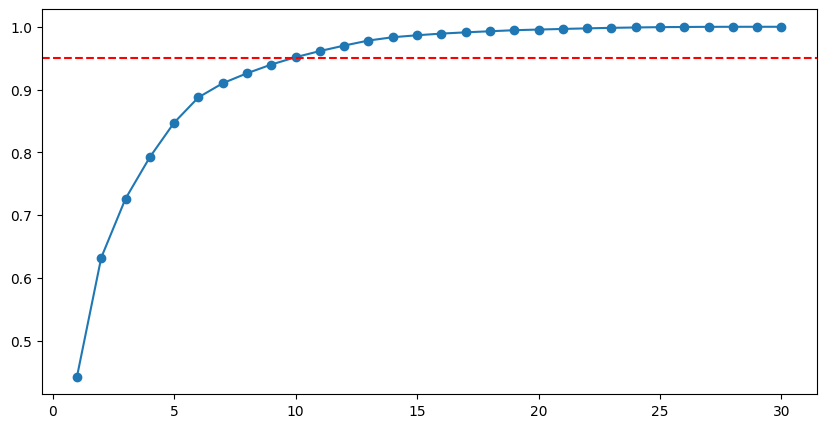

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(1, 31)), cumulative_var, marker='o')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()

PCA is unsupervised method and it’s difficult to interpret the two axes as they **are some complex mixture of the original features**.<br>
Każdy komponent PCA to mieszanina naszych zmiennych wejściowych.

## t-SNE

<div class="alert alert-block alert-success">
📍<b>t-SNE</b> - t-Distributed stochastic neighbour embedding<br>
    Stochastyczna metoda osadzania sąsiadów w oparciu o rozkład t-Studenta redukuje wymiarowość przy jednoczesnej próbie grupowania podobnych przykładów. Wykorzystujemy ją głównie do wizualizacji.<br>
    Algorytm t-SNE oblicza miarę podobieństwa między parami obserwacji w wielowymiarowej i małowymiarowej przestrzeni, a następnie optymalizuje te dwie miary (minimalizacja rozbieżności Kullbacka-Leiblera).<br>

Mechanizm działania:
<ol>
  <li>[Podobieństwo między punktami w <b>wielowymiarowej</b> przestrzeni] <br>
    Dla każdego punktu nanosimy rozkład normalny, a następnie mierzymy gęstość wszystkich punktów pod tym rozkładem normalnym.<br> 
    Otrzymujemy prawdopodobieństwa (odległości naniesione na rozkład normalny) odzwierciedlające podobieństwa między punktami.</li>
    Jeśli punkty są oddalone od siebie mają małe podobieństwo, a jeśli leżą blisko siebie, to duże.<br>
    <li>[Podobieństwo między punktami w <b>niskowymiarowej</b> przestrzeni] <br>
    Drugi krok jest podobny do pierwszego, z taką różnicą, że odległości między punktami nanosimy na rozkład t-Studenta, zamiast na rozkład normalny.<br></li>
    <li>[Odzwierciedlenie podobieństw z przestrzeni wielowymiarowej na przestrzeń niskowymiarową]<br>
    Minimalizujemy różnicę między rozkładami prawdopodobieństwa przestrzeni wielowymiarowej vs. niskowymiarowej, którą mierzymy za pomocą rozbieżności Kullbacka-Lieblera (KL)</li>
    </ol>
</div>

https://youtu.be/NEaUSP4YerM

<div class="alert alert-block alert-info">
📝 <b>Zadanie 3</b><br>
    Przygotujmy model t-SNE z argumentem <code>learning_rate='auto'</code>.<br>
    Przygotujmy wykres punktowy dla wyników modelu t-SNE odróżniając kolorem etykiety danych. Porównajmy go z wykresem przeskalowanych danych wejściowych dla wybranych cech.
</div>

In [44]:
from sklearn.manifold import TSNE

In [45]:
tsne = TSNE(init='random', learning_rate='auto', random_state=42)
tsne_data = tsne.fit_transform(X_scaled)
tsne_data

array([[  3.3162613 , -31.596258  ],
       [ -8.498078  , -21.520517  ],
       [  0.18591854, -28.549992  ],
       ...,
       [ -8.0369425 , -13.581845  ],
       [  4.688448  , -29.850126  ],
       [-11.036887  ,  23.237309  ]], dtype=float32)

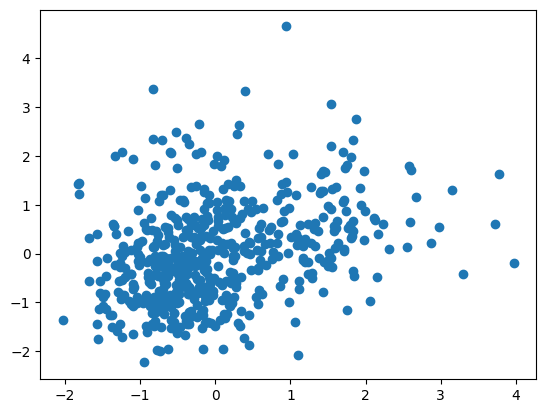

In [48]:
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1])
plt.show()

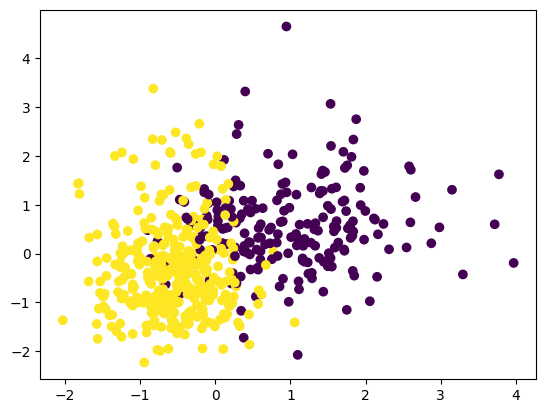

In [49]:
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=cancer['target'])
plt.show()

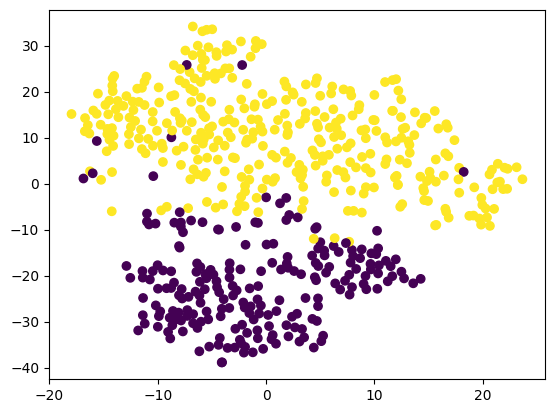

In [50]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cancer['target'])
plt.show()